# Model Training
Training Random Forest model for house price prediction

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.model import HousePriceModel

sns.set_style('whitegrid')

In [2]:
# Load data
df = pd.read_csv('../data/geeksforgeeks/california_housing.csv')
print(f"Loaded {len(df)} samples")
df.head()

Loaded 20640 samples


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Prepare features and target
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

print("Features:", X.columns.tolist())
print("Target:", y.name)

Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target: MedHouseVal


In [4]:
# Train model
model = HousePriceModel()
results = model.train(X, y)

Training Random Forest model...

✓ Model Performance:
  RMSE: 0.5101
  R² Score: 0.8014


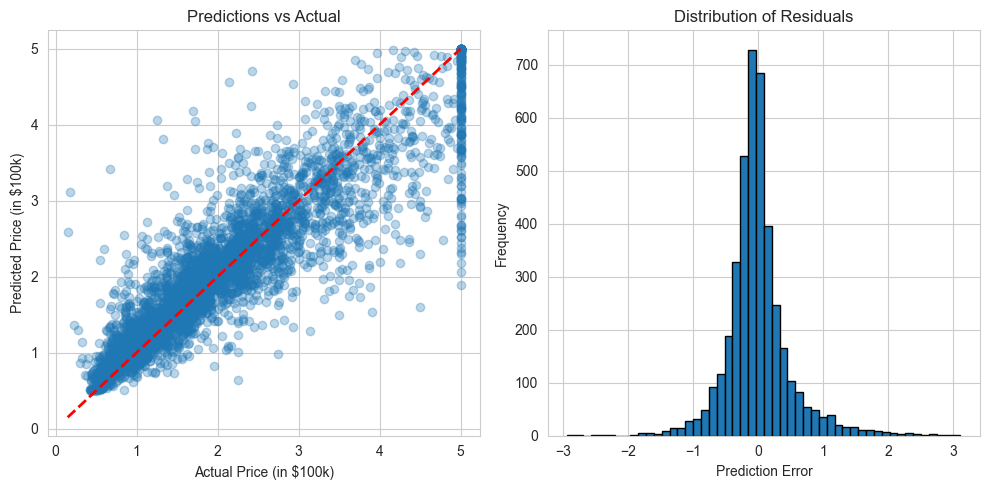

In [5]:
# Visualize predictions vs actual
y_test = results['y_test']
y_pred = model.predict(results['X_test'])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (in $100k)')
plt.ylabel('Predicted Price (in $100k)')
plt.title('Predictions vs Actual')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.hist(residuals, bins=50, edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

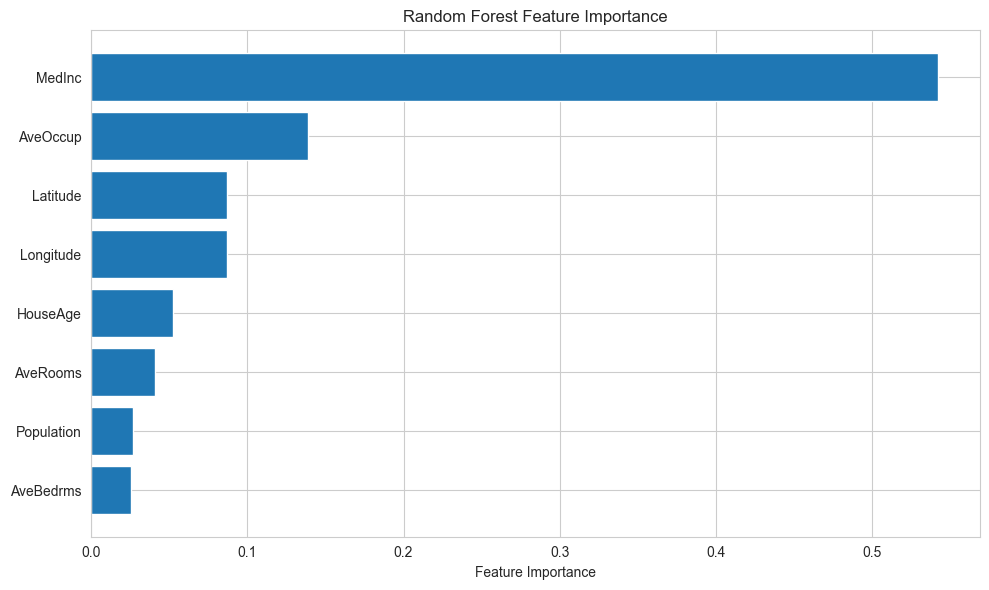


Feature Importance:
      feature  importance
0      MedInc    0.542053
5    AveOccup    0.138727
6    Latitude    0.087189
7   Longitude    0.086805
1    HouseAge    0.052226
2    AveRooms    0.040653
4  Population    0.026613
3   AveBedrms    0.025735


In [6]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': model.feature_names,
    'importance': model.model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance:")
print(feature_importance)

In [7]:
# Save model
model.save('../models/house_price_model.pkl')
print("\n✓ Model training complete and saved!")

✓ Model saved to ../models/house_price_model.pkl

✓ Model training complete and saved!
